In [1]:
import pandas as pd 
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pyproj
import pandas as pd
import regex as reg


Loading Data

In [2]:
# Load the data
mastra_df = pd.read_csv('mastra.csv')
aadt_df = pd.read_excel('AADT.xlsx')

In [3]:
# Load streetnetwork
streetnetwork_df = gpd.read_file('aalborg_network.gpkg')

Preperation

In [4]:
# Convert UTM32 to latitude and longitude (WGS 84)
utm_zone = 32  # UTM zone for your coordinates
proj_utm = pyproj.CRS(f'epsg:326{utm_zone}')  # EPSG code for UTM32N
proj_wgs = pyproj.CRS('epsg:4326')  # EPSG code for WGS 84

# Create a transformer object
transformer = pyproj.Transformer.from_crs(proj_utm, proj_wgs, always_xy=True)
# Function to convert UTM to WGS84
def utm_to_wgs(row):
    try:
        lon, lat = transformer.transform(row['Xkoordinat'], row['Ykoordinat'])
    except:
        lon, lat = transformer.transform(row['X-koordinat'], row['Y-koordinat'])
    return pd.Series({'latitude': lat, 'longitude': lon})

# Convert the coordinates
mastra_df[['latitude', 'longitude']] = mastra_df[['Xkoordinat', 'Ykoordinat']].apply(utm_to_wgs, axis=1)
mastra_df.drop(['Xkoordinat', 'Ykoordinat'], inplace=True, axis=1)
aadt_df[['latitude', 'longitude']] = aadt_df[['X-koordinat', 'Y-koordinat']].apply(utm_to_wgs, axis=1)
aadt_df.drop(['X-koordinat', 'Y-koordinat'], inplace=True, axis=1)

In [5]:
pd.options.display.max_columns = None
mastra_df.columns
pd.options.display.max_rows = 20

Clean data

In [6]:
# Verify the column names in the DataFrame
print(aadt_df.columns)

# reg ex to replace , with . on the whole document
aadt_df = aadt_df.replace({',': '.'}, regex=True)

# Correct column names if necessary
columns_to_convert = [
    'Lastbil %',
    '15% hast.-fraktil', 
    '85% hast.-fraktil', 
    '% over hastighedsgr.',
    '% o. hastgr + 10km/t', 
    '% o. hastgr + 20km/t',
    'Talte dage',
    'Gennemsnitshastighed',
    'Lastbil %',
    'Største time'
]

# Convert the specified columns to float64
aadt_df = aadt_df.astype({col: 'float64' for col in columns_to_convert})


# Correct column names if necessary
columns_to_convert = [
    'Vejdel',
    'Lokalitet',
    'Vejnavn',
    'Køretøjsart',
    'StedId'
]

# Convert the specified columns to float64
aadt_df = aadt_df.astype({col: 'string' for col in columns_to_convert})

Index(['Dataejer', 'Bestyrer', 'Adm.vejnr', 'Vejdel', 'Kilometer', 'Meter',
       'Lokalitet', 'Vejnavn', 'Køretøjsart', 'År', 'StedId', 'Talte dage',
       'ÅDT', 'HDT', 'JDT', 'HDT.1', 'Gennemsnitshastighed', 'Æ10 Høj',
       'Æ10 Lav', 'Lastbil ÅDT', 'o. 1250 ÅDT', 'Lastbil %',
       '15% hast.-fraktil', '85% hast.-fraktil', '% over hastighedsgr.',
       '% o. hastgr + 10km/t', '% o. hastgr + 20km/t', 'Hastighedsgrænse',
       'Største time', 'Største time datotid', 'Morgen spids time',
       'Morgen spids st. tid', 'Efterm. spids time', 'Efterm. spids st. t.',
       'latitude', 'longitude'],
      dtype='object')


In [7]:
aadt_df['Største time datotid'] = pd.to_datetime(aadt_df['Største time datotid'], errors='coerce')
aadt_df['Morgen spids st. tid'] = aadt_df['Morgen spids st. tid'].replace(':', np.nan)
aadt_df['Morgen spids st. tid (since Midnight)'] = pd.to_timedelta(aadt_df['Morgen spids st. tid'] + ':00', errors='coerce')
aadt_df.drop('Morgen spids st. tid', axis=1, inplace=True)


aadt_df['Efterm. spids st. t.'] = aadt_df['Efterm. spids st. t.'].replace(':', np.nan)
aadt_df['Efterm. spids st. t. (since Midnight)'] = pd.to_timedelta(aadt_df['Efterm. spids st. t.'] + ':00', errors='coerce')
aadt_df.drop('Efterm. spids st. t.', axis=1, inplace=True)

C:\Users\gonde\AppData\Local\Temp\ipykernel_15536\4129793633.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  aadt_df['Største time datotid'] = pd.to_datetime(aadt_df['Største time datotid'], errors='coerce')


mastra

In [8]:
# Verify the column names in the DataFrame
print(mastra_df.columns)

# reg ex to replace , with . on the whole document
mastra_df = mastra_df.replace({',': '.'}, regex=True)
mastra_df = mastra_df.replace({'LÃ¸rdag': "Loerdag"}, regex=True)
mastra_df = mastra_df.replace({'SÃ¸ndag': "Soendag"}, regex=True)


mastra_df.rename(columns={'MÃ¥ned': 'Maened'}, inplace=True)
mastra_df.rename(columns={'Ãrstal': 'Aarstal'}, inplace=True)
mastra_df.rename(columns={'ï»¿Vej-Id': 'Vej-Id'}, inplace=True)

mastra_df.drop(columns=['Unnamed: 1', 'Unnamed: 2'], inplace=True)

# Correct column names if necessary
columns_to_convert = [

]

# Convert the specified columns to float64
mastra_df = mastra_df.astype({col: 'float64' for col in columns_to_convert})


# Correct column names if necessary
columns_to_convert = [
    'Trafiktype',
    'Dagtype',
    'Vej-Id',
    'Retning',
    'Trafiktype'
]

# Convert the specified columns to float64
mastra_df = mastra_df.astype({col: 'string' for col in columns_to_convert})

mastra_df = mastra_df.replace({'<NA>': ""}, regex=True)

Index(['ï»¿Vej-Id', 'Unnamed: 1', 'Unnamed: 2', 'Kilometer', 'Retning', 'Spor',
       'Dato', 'Ãrstal', 'MÃ¥ned', 'Dag',
       ...
       '22:00-22:15', '22:15-22:30', '22:30-22:45', '22:45-23:00',
       '23:00-23:15', '23:15-23:30', '23:30-23:45', '23:45-24:00', 'latitude',
       'longitude'],
      dtype='object', length=110)


Plot to make sure everything is fine

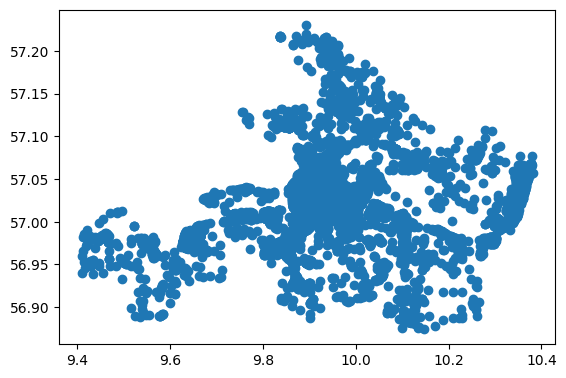

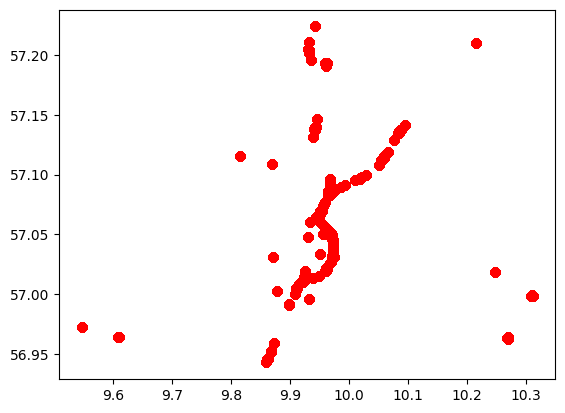

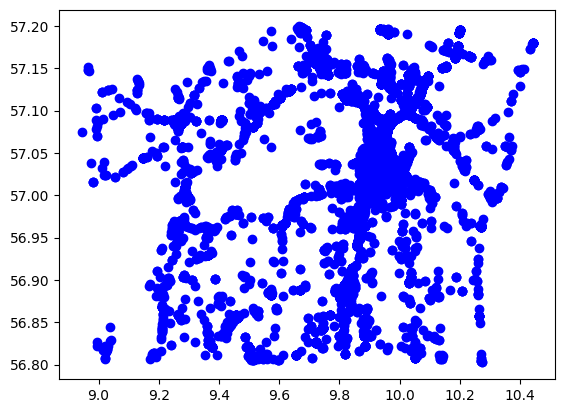

In [9]:
streetnetwork_df.plot()
plt.show()

plt.scatter(mastra_df['longitude'], mastra_df['latitude'], c='red')
plt.show()

plt.scatter(aadt_df['longitude'], aadt_df['latitude'], c='blue')
plt.show()


Merge

In [10]:
# Convert mastra_df and aadt_df to GeoDataFrames
mastra_gdf = gpd.GeoDataFrame(
    mastra_df,
    geometry=gpd.points_from_xy(mastra_df['longitude'], mastra_df['latitude']),
    crs="EPSG:4326"  # Assuming WGS84 coordinates
)

aadt_gdf = gpd.GeoDataFrame(
    aadt_df,
    geometry=gpd.points_from_xy(aadt_df['longitude'], aadt_df['latitude']),
    crs="EPSG:4326"  # Assuming WGS84 coordinates
)

# Ensure the street network GeoDataFrame is in the same CRS
if streetnetwork_df.crs.to_epsg() != 4326:
    streetnetwork_df = streetnetwork_df.to_crs("EPSG:4326")

# Re-project the street network to UTM32 (EPSG:32632)
utm_crs = "EPSG:32632"  # UTM zone 32N (for Denmark)
streetnetwork_utm = streetnetwork_df.to_crs(utm_crs)

# Re-project the mastra_df and aadt_df to UTM32
mastra_utm = mastra_gdf.to_crs(utm_crs)
aadt_utm = aadt_gdf.to_crs(utm_crs)

In [13]:
import pandas as pd

# Assuming your DataFrame is named `traffic_df`
# Columns for each 15-minute interval (00:00-00:15, 00:15-00:30, etc.)
time_columns = [
    "00:00-00:15","00:15-00:30","00:30-00:45","00:45-01:00","01:00-01:15","01:15-01:30","01:30-01:45","01:45-02:00","02:00-02:15","02:15-02:30","02:30-02:45","02:45-03:00","03:00-03:15","03:15-03:30","03:30-03:45","03:45-04:00","04:00-04:15","04:15-04:30","04:30-04:45","04:45-05:00","05:00-05:15","05:15-05:30","05:30-05:45","05:45-06:00","06:00-06:15","06:15-06:30","06:30-06:45","06:45-07:00","07:00-07:15","07:15-07:30","07:30-07:45","07:45-08:00","08:00-08:15","08:15-08:30","08:30-08:45","08:45-09:00","09:00-09:15","09:15-09:30","09:30-09:45","09:45-10:00","10:00-10:15","10:15-10:30","10:30-10:45","10:45-11:00","11:00-11:15","11:15-11:30","11:30-11:45","11:45-12:00","12:00-12:15","12:15-12:30","12:30-12:45","12:45-13:00","13:00-13:15","13:15-13:30","13:30-13:45","13:45-14:00","14:00-14:15","14:15-14:30","14:30-14:45","14:45-15:00","15:00-15:15","15:15-15:30","15:30-15:45","15:45-16:00","16:00-16:15","16:15-16:30","16:30-16:45","16:45-17:00","17:00-17:15","17:15-17:30","17:30-17:45","17:45-18:00","18:00-18:15","18:15-18:30","18:30-18:45","18:45-19:00","19:00-19:15","19:15-19:30","19:30-19:45","19:45-20:00","20:00-20:15","20:15-20:30","20:30-20:45","20:45-21:00","21:00-21:15","21:15-21:30","21:30-21:45","21:45-22:00","22:00-22:15","22:15-22:30","22:30-22:45","22:45-23:00","23:00-23:15","23:15-23:30","23:30-23:45","23:45-24:00"
]

# Unpivot the dataframe to a long format
traffic_long_df = pd.melt(
    mastra_utm,
    id_vars=["Dato","Vej-Id"],  # Replace with columns that uniquely identify each row, such as road segment ID
    value_vars=time_columns,  # Columns representing the time intervals
    var_name="time_interval",  # Name for the new column that will hold the time intervals
    value_name="traffic_flow"  # Name for the new column that will hold the traffic data
)

# After melting, each row will represent a road segment at a specific 15-minute interval
print(traffic_long_df.head())

         Dato             Vej-Id time_interval  traffic_flow
0  01.01.2023  0 70-0 277/ 100 -   00:00-00:15          11.0
1  02.01.2023  0 70-0 277/ 100 -   00:00-00:15          14.0
2  03.01.2023  0 70-0 277/ 100 -   00:00-00:15          33.0
3  04.01.2023  0 70-0 277/ 100 -   00:00-00:15          21.0
4  05.01.2023  0 70-0 277/ 100 -   00:00-00:15          21.0


In [36]:
# Extract the start time from 'time_interval'
traffic_long_df['time_start'] = traffic_long_df['time_interval'].str[:5]  # Extracts the "00:00" part for sorting


traffic_long_df['datetime'] = pd.to_datetime(traffic_long_df['Dato'] + " " + traffic_long_df['time_start'], dayfirst=True)


traffic_long_df = traffic_long_df.sort_values(by=['Vej-Id', 'Dato', 'time_start'])


# Result
print(traffic_long_df.head())


               Dato            Vej-Id time_interval  traffic_flow  \
33655    01.02.2023  0 450-0 7/ 300 +   00:00-00:15          10.0   
302697   01.02.2023  0 450-0 7/ 300 +   00:15-00:30          10.0   
571739   01.02.2023  0 450-0 7/ 300 +   00:30-00:45           7.0   
840781   01.02.2023  0 450-0 7/ 300 +   00:45-01:00           3.0   
1109823  01.02.2023  0 450-0 7/ 300 +   01:00-01:15           3.0   

                   datetime time_start  
33655   2023-02-01 00:00:00      00:00  
302697  2023-02-01 00:15:00      00:15  
571739  2023-02-01 00:30:00      00:30  
840781  2023-02-01 00:45:00      00:45  
1109823 2023-02-01 01:00:00      01:00  


In [45]:
streetnetwork_utm

,osmid,y,x,street_count,crossing_type,traffic_signal,intersection_type,proximity_to_school,proximity_to_hospital,proximity_to_park,betweenness_centrality,closeness_centrality,highway,ref,crossing,crossing_ref,traffic_signals,tactile_paving,kerb,geometry
0,27464487,57.059731,9.918446,3,None,False,Other,153.559391,1272.412839,656.839302,0.000283,0.019344,,,,,,,None,POINT (555703.246 6324409.649)
1,27464493,57.057575,9.922434,3,None,False,Other,340.912688,1148.431944,662.484500,0.000798,0.020796,,,,,,,None,POINT (555948.369 6324172.869)
2,27464543,57.051687,9.918504,3,None,False,Other,556.724531,483.486265,235.983506,0.000376,0.021090,,,,,,,None,POINT (555718.816 6323514.326)
3,27475663,57.045007,9.928775,1,None,False,Other,172.773457,725.780407,182.599903,0.000140,0.019778,,,,,,,None,POINT (556351.974 6322779.203)
4,27475664,57.045658,9.929103,4,None,False,Crossroad,232.657949,779.313600,205.894332,0.002084,0.020447,,,,,,,None,POINT (556370.877 6322851.869)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14265,12209399589,57.025066,9.942794,3,traffic_signals,False,Other,138.729384,2183.281051,589.351887,0.000562,0.022412,crossing,,yes,unknown,unknown,,None,POINT (557233.153 6320571.186)
14266,12209400203,57.026002,9.943764,3,None,False,Other,169.897765,2120.711987,566.113305,0.001720,0.022853,,,,,,,None,POINT (557290.626 6320676.175)
14267,12209400205,57.026756,9.944240,4,None,False,Other,211.899704,2092.550398,560.464385,0.001536,0.022341,,,,,,,None,POINT (557318.341 6320760.524)
14268,12211730394,57.026688,9.944228,5,None,False,Other,219.089419,2093.052330,558.621244,0.001537,0.022851,,,,,,,None,POINT (557317.741 6320753.000)


In [39]:
if streetnetwork_df.crs.to_epsg() != 4326:
    streetnetwork_df = streetnetwork_df.to_crs(epsg=4326)

# Merge the traffic data (traffic_long_df) with the street network (streetnetwork_df) on 'Vej-Id'
streetnetwork_with_traffic = streetnetwork_df.merge(traffic_long_df, on='Vej-Id', how='left')

# Check the result
print(streetnetwork_with_traffic.head())


TypeError: DataFrame.merge() got an unexpected keyword argument 'axis'